# Author's Comment
The Comments below is wrtten by the kaggle user, who uploaded this dataset.
First thing I want to tell you is that the purpose of this notebook is to predict one's victory based on the conditions written on the datasets. And it'll be achieved by a classfication, and trendy XGboost model to get it better.

The second thing is that, I repeat these on my notebook just to let you know that I just followed the guidlines referred by the user.
If I continue to revise my model and work on it, it'd be much better to predict the victory of the battle.




## History of Battle
This dataset is a cleaned-up and modernized version of "CAA Database of Battles, Version 1990", shortnamed "CDB90". It contains information on over 600 battles that were fought between 1600 AD and 1973 AD. Descriptive data include battle name, date, and location; the strengths and losses on each side; identification of the victor; temporal duration of the battle; and selected environmental and tactical environment descriptors (such as type of fortifications, type of tactical scheme, weather conditions, width of front, etc.).


## Content
The data contained therein is split across several files. The most important of these is battles.csv, which is lists and gives information about the battles themselves. Files marked enum describe the keys used by specific fields. Other files provide additional context.

## Inspiration
-How often were battles fought in various weather conditions?

-How often did an attacker or defender achieve the element of surprise?

-Did it have a significant effect on the outcome?

-Did prepared fortifications have a significant effect on outcomes?


# Features

Before we get to the project, I'll make a referrence of the features to make it easier to understand the table.

-aeroa: air superitority

-cea: how much the actor favors attack or defense

-codead: total strength

-crit: ???

-post: how much defense prepared

-postype: posture taken

-pri: the form of tactics

-wina: 0-draw/1-attacker win/ -1 - attacker loss

-reso: result of the battle

-surpa: how much surprise achieved by attacker/defender

front_width: the features in it are unknown


### Terrain
-terra1 : None/Rugged/Rollig/Flat

-terra2 : Bare/Desert/Heavily Wooded/Mixed

-terra3 : None/ Marsh or Swamp/ Urban /Dunes

### Weather


-wx1: Dry/wet

-wx2: Heavy Precipitatiion/Sunny/Light Precipitation/Overcast

-wx3: hot/cold/temperate

-wx4: Spring/Summer/Fall/Winter

-wx5: Tropical/Desert/Temperate



# Data Overview

As mentioned above, the first phase will be just using 4 features.

-weather

-terrain

-the element of surprise

-fortification



Any other background knowledge will be used later on.
Before that, let us first overview the dataset.

# Importing Libraries

In [289]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load


#data processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import xgboost as xgb
import plotly.graph_objects as go

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/database-of-battles/enum_wx4.csv
/kaggle/input/database-of-battles/enum_terra3.csv
/kaggle/input/database-of-battles/battle_durations.csv
/kaggle/input/database-of-battles/enum_wx3.csv
/kaggle/input/database-of-battles/active_periods.csv
/kaggle/input/database-of-battles/weather.csv
/kaggle/input/database-of-battles/enum_terra2.csv
/kaggle/input/database-of-battles/enum_wx2.csv
/kaggle/input/database-of-battles/enum_wx1.csv
/kaggle/input/database-of-battles/enum_wina.csv
/kaggle/input/database-of-battles/enum_crit.csv
/kaggle/input/database-of-battles/enum_wx5.csv
/kaggle/input/database-of-battles/enum_postype.csv
/kaggle/input/database-of-battles/battle_actors.csv
/kaggle/input/database-of-battles/battles.csv
/kaggle/input/database-of-battles/enum_post.csv
/kaggle/input/database-of-battles/commanders.csv
/kaggle/input/database-of-battles/enum_terra1.csv
/kaggle/input/database-of-battles/enum_aeroa.csv
/kaggle/input/database-of-battles/terrain.csv
/kaggle/input/database-o

In [290]:
#algorithms
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC, LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.metrics import precision_score, recall_score, accuracy_score

#dataframe display settings
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 50)

# Exploring Dataset

## Tables

In [291]:
battle = pd.read_csv('/kaggle/input/database-of-battles/battles.csv')
display(battle.tail())
print(battle.columns)

,isqno,war,name,locn,campgn,postype,post1,post2,front,depth,time,aeroa,surpa,cea,leada,trnga,morala,logsa,momnta,intela,techa,inita,wina,kmda,crit,quala,resa,mobila,aira,fprepa,wxa,terra,leadaa,plana,surpaa,mana,logsaa,fortsa,deepa,is_hero,war2,war3,war4,war4_theater,dbpedia,cow_warno,cow_warname,war_initiator,parent
655,656,"ARAB-ISRAELI, 1948",JERUSALEM CORRIDOR,WEST BANK,JERUSALEM CORRIDOR,9,PD,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,"ARAB-ISRAELI, 1948","ARAB-ISRAELI, 1948",Arab-Israeli War of 1948-1949,NaN,http://dbpedia.org/resource/Operation_Danny,148.0,Arab-Israeli War of 1948-1949,0,NaN
656,657,WORLD WAR II,ARDENNES,NORTHWEST EUROPE,ARDENNES 1940,9,NaN,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,1,NaN
657,658,WORLD WAR II,CAMBRAI,NORTHWEST EUROPE,CAMBRAI,9,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,48.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,1,NaN
658,659,WORLD WAR II,ARRAS,NORTHWEST EUROPE,ARRAS,9,HD,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,0,NaN
659,660,WORLD WAR II,BOOS,NORTHWEST EUROPE,BOOS,9,PD,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,WORLD WAR II (FRANCE 1940),WORLD WAR II,World War II of 1939-1945,Western Front,NaN,139.0,World War II of 1939-1945,0,NaN


Index(['isqno', 'war', 'name', 'locn', 'campgn', 'postype', 'post1', 'post2',
       'front', 'depth', 'time', 'aeroa', 'surpa', 'cea', 'leada', 'trnga',
       'morala', 'logsa', 'momnta', 'intela', 'techa', 'inita', 'wina', 'kmda',
       'crit', 'quala', 'resa', 'mobila', 'aira', 'fprepa', 'wxa', 'terra',
       'leadaa', 'plana', 'surpaa', 'mana', 'logsaa', 'fortsa', 'deepa',
       'is_hero', 'war2', 'war3', 'war4', 'war4_theater', 'dbpedia',
       'cow_warno', 'cow_warname', 'war_initiator', 'parent'],
      dtype='object')


In [292]:
terrain = pd.read_csv('/kaggle/input/database-of-battles/terrain.csv')
display(terrain.tail())
print(terrain.columns)

,isqno,terrano,terra1,terra2,terra3
784,656,1,R,B,NaN
785,657,1,R,M,NaN
786,658,1,R,M,NaN
787,659,1,R,M,NaN
788,660,1,R,M,NaN


Index(['isqno', 'terrano', 'terra1', 'terra2', 'terra3'], dtype='object')


In [293]:
weather = pd.read_csv('/kaggle/input/database-of-battles/weather.csv')
display(weather.tail())
print(weather.columns)

,isqno,wxno,wx1,wx2,wx3,wx4,wx5
782,656,1,D,NaN,H,S,D
783,657,1,W,L,T,$,T
784,658,1,W,L,T,$,T
785,659,1,D,NaN,T,$,T
786,660,1,W,L,T,S,T


Index(['isqno', 'wxno', 'wx1', 'wx2', 'wx3', 'wx4', 'wx5'], dtype='object')


There are only 4 features that we're interested in, so we are gonna merge these tables and have only the features left.

-weather
-terrain
-fortification
-element of surprise achieved or not

In [294]:
#The revised dataset that contains all information needed

df = pd.merge(battle, terrain , on="isqno")
df = pd.merge(df, weather, on = "isqno")
df.set_index('isqno', inplace = True)
df = df[['surpa', 'post1', 'post2', 'wx1', 'wx2', 'wx3', 'wx4', 'wx5', 'terra1', 'terra2', 'terra3', 'wina']]

display(df.tail())

,surpa,post1,post2,wx1,wx2,wx3,wx4,wx5,terra1,terra2,terra3,wina
isqno,,,,,,,,,,,,
656,0.0,PD,NaN,D,NaN,H,S,D,R,B,NaN,NaN
657,3.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0
658,1.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0
659,0.0,HD,NaN,D,NaN,T,$,T,R,M,NaN,NaN
660,0.0,PD,NaN,W,L,T,S,T,R,M,NaN,0.0


In [295]:
# Based on what I searched for, Nan datas in 'wina' are supposed to be -1.(attacker loss)
df['wina'] = df['wina'].fillna(-1)
display(df)

,surpa,post1,post2,wx1,wx2,wx3,wx4,wx5,terra1,terra2,terra3,wina
isqno,,,,,,,,,,,,
1,0.0,HD,NaN,D,S,T,S,T,R,B,D,-1.0
2,0.0,HD,PD,D,S,T,W,T,R,M,NaN,1.0
3,0.0,HD,NaN,D,S,H,$,T,R,M,NaN,1.0
4,NaN,PD,NaN,D,S,T,$,T,R,M,NaN,-1.0
5,0.0,HD,NaN,D,S,T,S,T,R,M,NaN,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
656,0.0,PD,NaN,D,NaN,H,S,D,R,B,NaN,-1.0
657,3.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0
658,1.0,NaN,NaN,W,L,T,$,T,R,M,NaN,1.0


The reason the amount of the datas increased is that each war consists of a few battles, and each battle has its own condition.
But it seems that the datas sharing same isqno have the same 'wina' value, so we don't need to set up the function to fix it.

* Different condtions but same result! Need to think about it one day

## Missing Data


Now we'll check missing data and se the tables in the form easy to analyse.

### Element of Surprise achieved or not

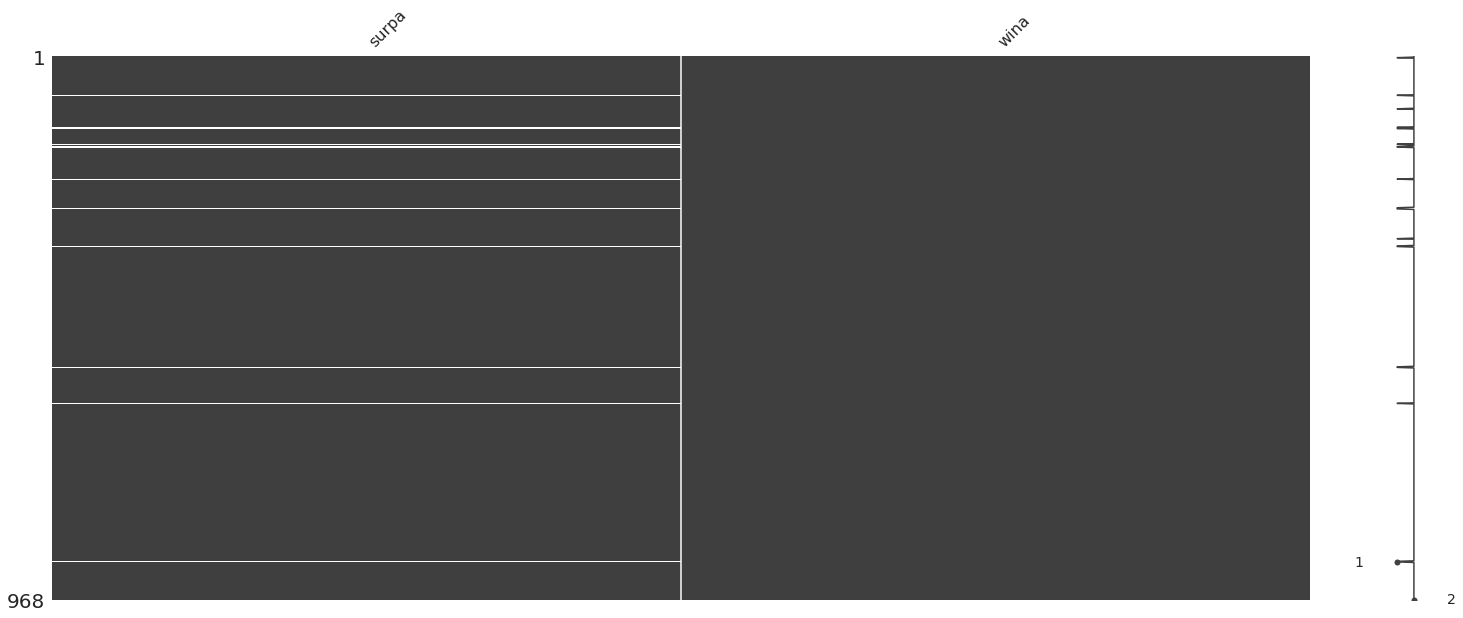

surpa    20
wina      0
dtype: int64


In [296]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
surprise = df[['surpa', 'wina']]

msno.matrix(surprise)
plt.show()

print(surprise.isnull().sum())

### Terrain

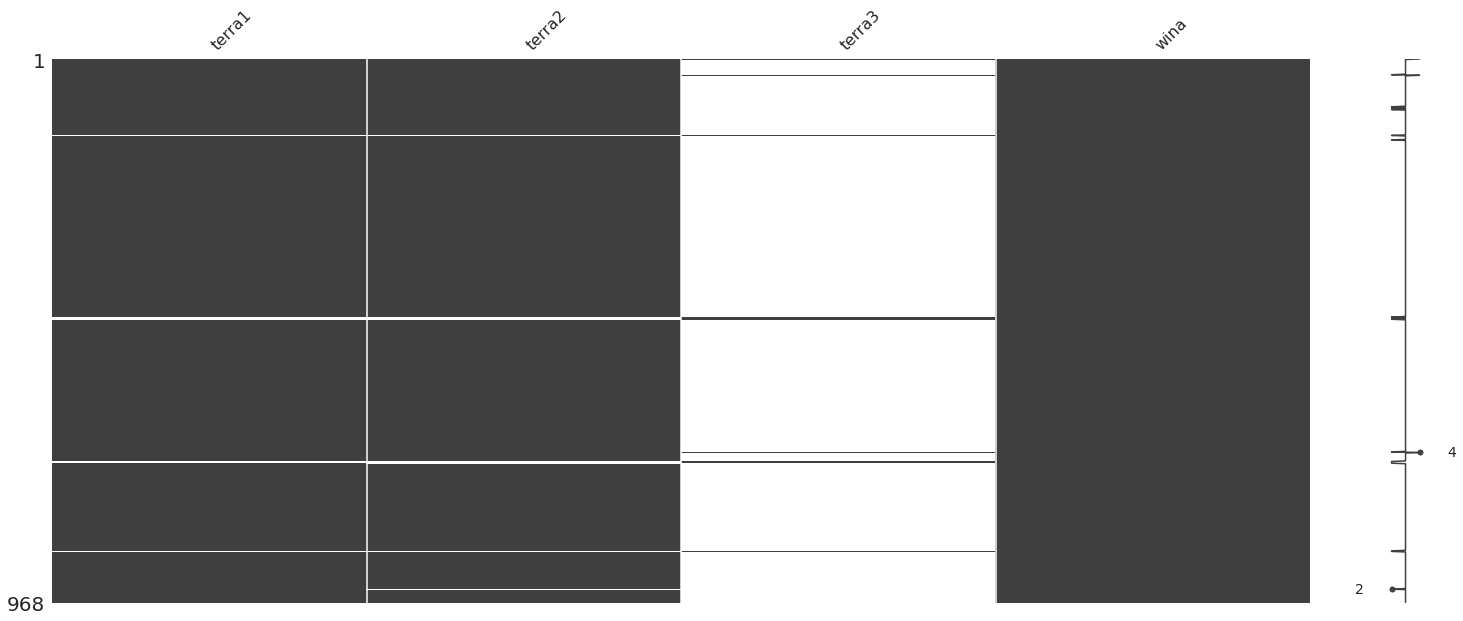

terra1     14
terra2     18
terra3    950
wina        0
dtype: int64


In [297]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
terrain = df[['terra1', 'terra2', 'terra3', 'wina']]

msno.matrix(terrain)
plt.show()

print(terrain.isnull().sum()) 

### Weather

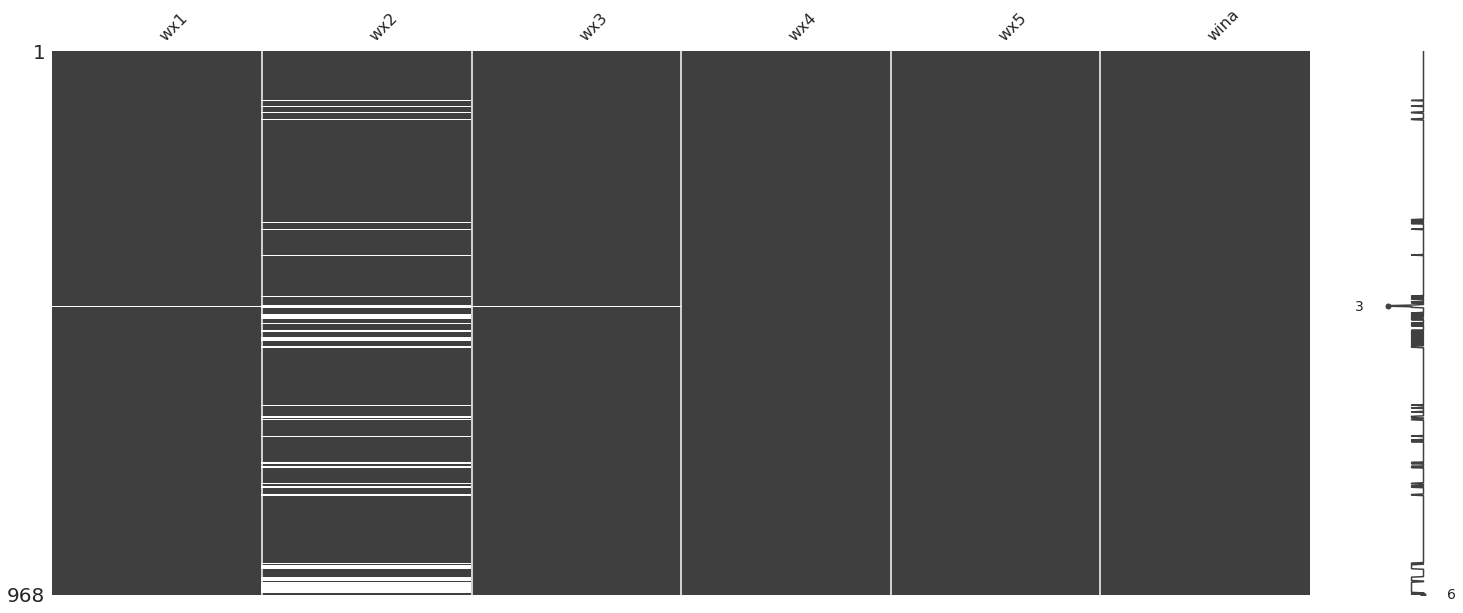

wx1       2
wx2     108
wx3       2
wx4       0
wx5       0
wina      0
dtype: int64


In [298]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
weather = df[['wx1', 'wx2', 'wx3', 'wx4', 'wx5','wina']]

msno.matrix(weather)
plt.show()

print(weather.isnull().sum())

### Fortification

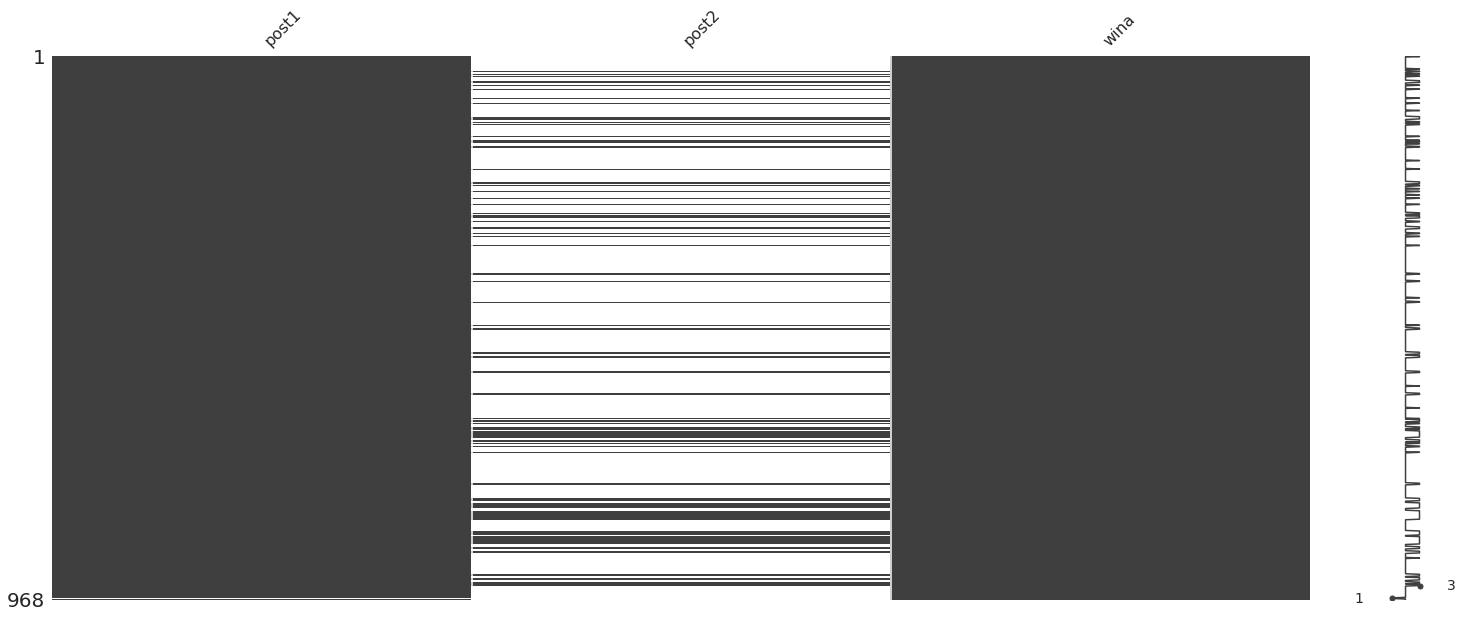

post1      2
post2    767
wina       0
dtype: int64


In [299]:
import missingno as msno
#checking if there's any empty values on the chart.


#checking if there's any empty values on the chart.
fortification = df[['post1', 'post2' ,'wina']]
msno.matrix(fortification)
plt.show()

print(fortification.isnull().sum())

## Data Overview

### Wina Reference

    * -1 : attacker loss
    * 0 : draw
    * 1 : attaccker win

### Element of Surprise

### Element of Surprise reference

-3 ~ -1 : surprise achieved by defender(-3: most, -2: substantial , -1: minor)
    
0 : Neither Side surprised
    
1 ~ 3 : surprise achieved by attacker(3: most, 2: substantial , 1: minor)

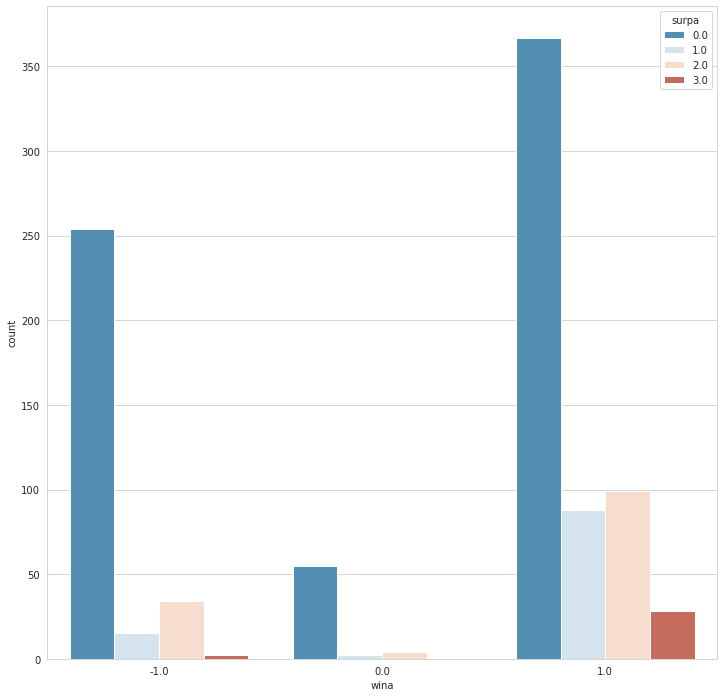

In [300]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x='wina',hue='surpa',data= surprise ,palette='RdBu_r')

### Terrain

### Terrain reference

terra 1:
    
    0 - None

    R - Rolling
    
    G - Rugged
    
    F - Flat
    
terra 2:
    
    0 - None
    
    B - Bare
    
    M - Mixed
    
    D - Desert
    
    W - Heavily Wooded
    
terra 3 :
    
    0 - None
    
    M - Marsh or Swamp
    
    U - Urban
    
    D - Dunes

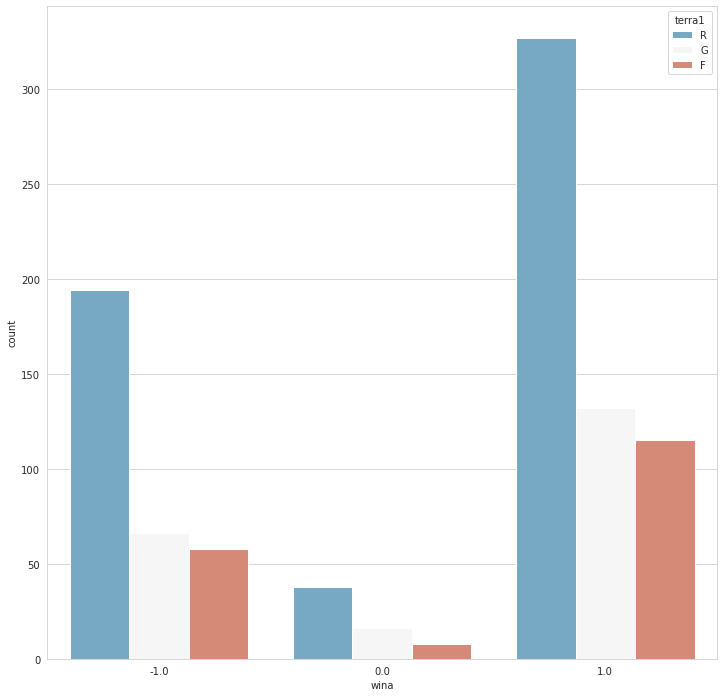

In [301]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x = 'wina', hue='terra1',data= terrain ,palette='RdBu_r')

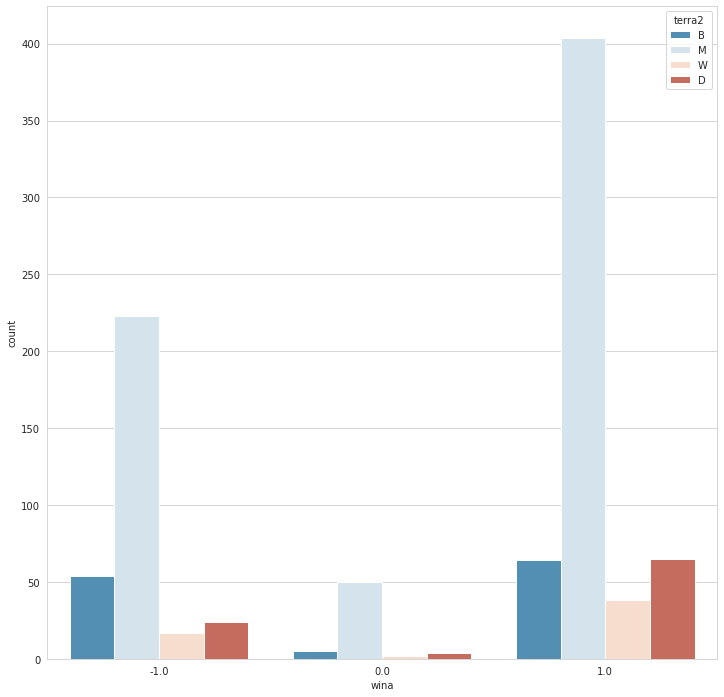

In [302]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x = 'wina', hue='terra2',data= terrain ,palette='RdBu_r')

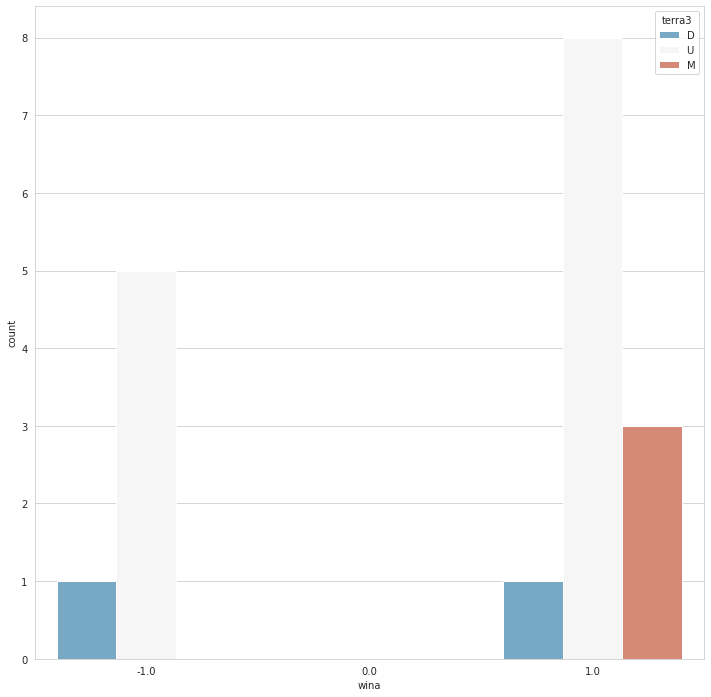

In [303]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x = 'wina', hue='terra3',data= terrain ,palette='RdBu_r')

### Weather

### Weather Reference

wx1:
    
    D - Dry
    W - Wet
    
wx2:
    
    H - Heavy Precipitatiion
    S - Sunny (no precipitation)
    L - Light Precipitation
    O - Overcast (no precipitation)
    
wx3:
    
    H - Hot
    C - Cold
    T - Temparate
    
wx4:

    S - Summer
    $ - Spring
    W - Winter
    F - Fall
    
wx5 : 
    
    E - Tropical (i.e., "Equatorial")
    D - Desert
    T - Temperate

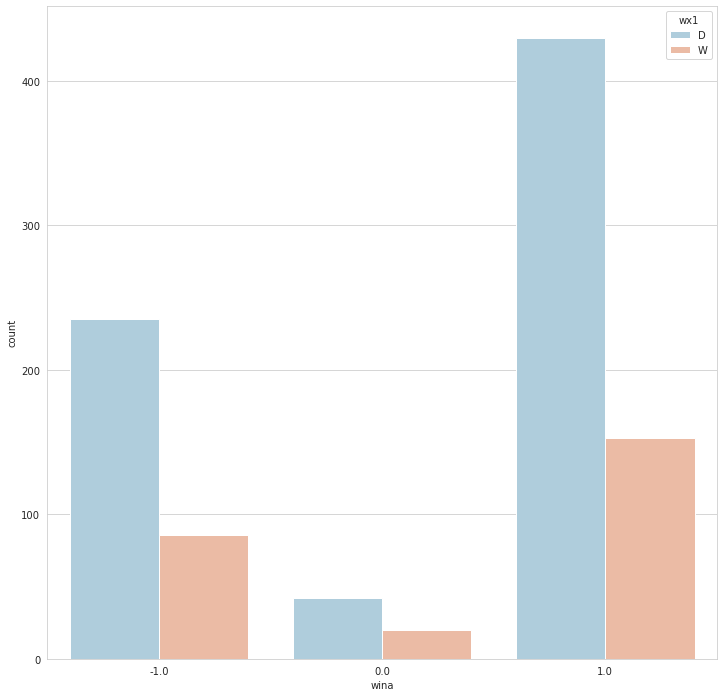

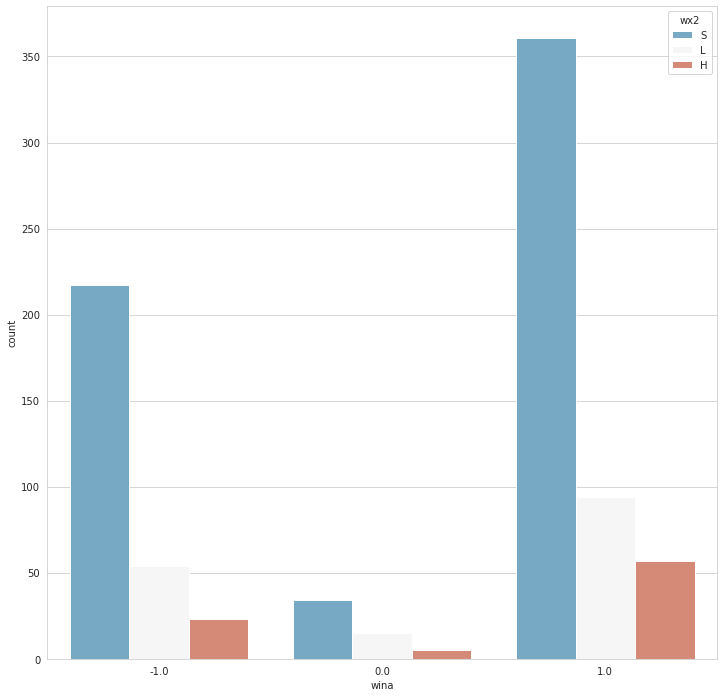

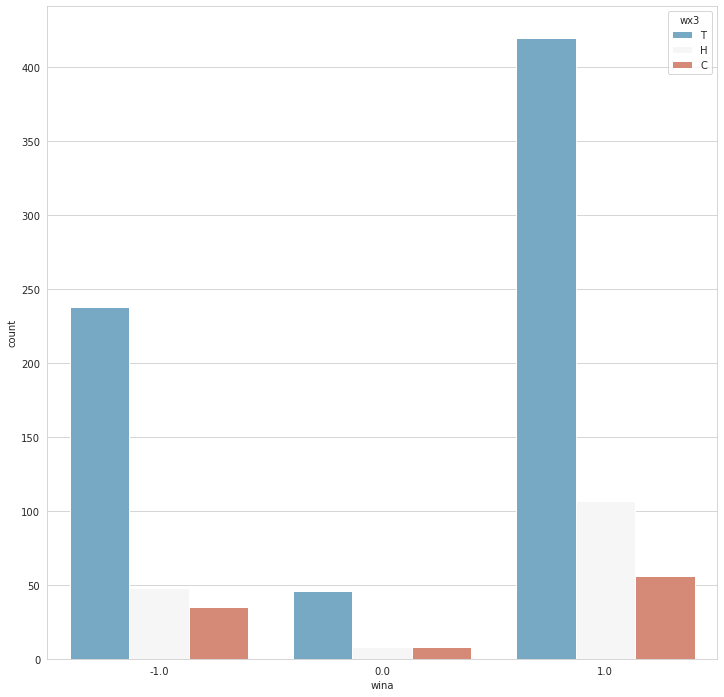

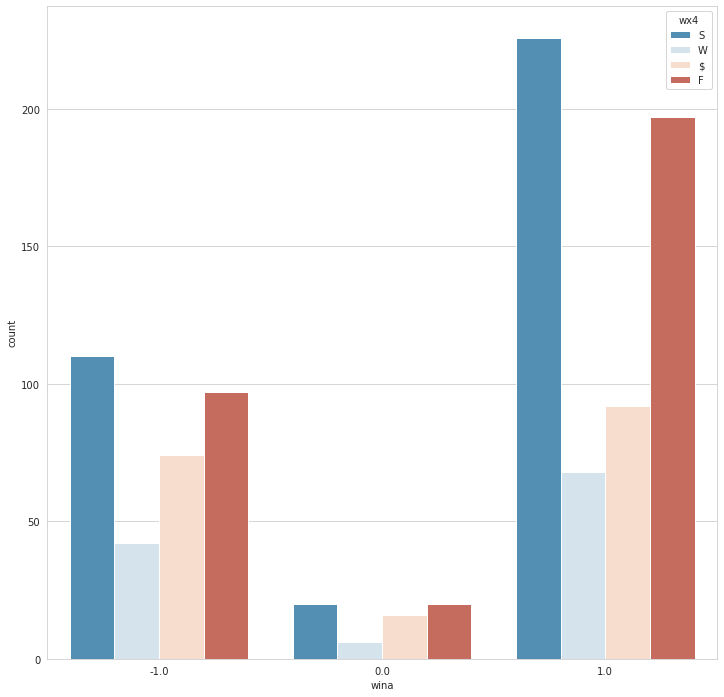

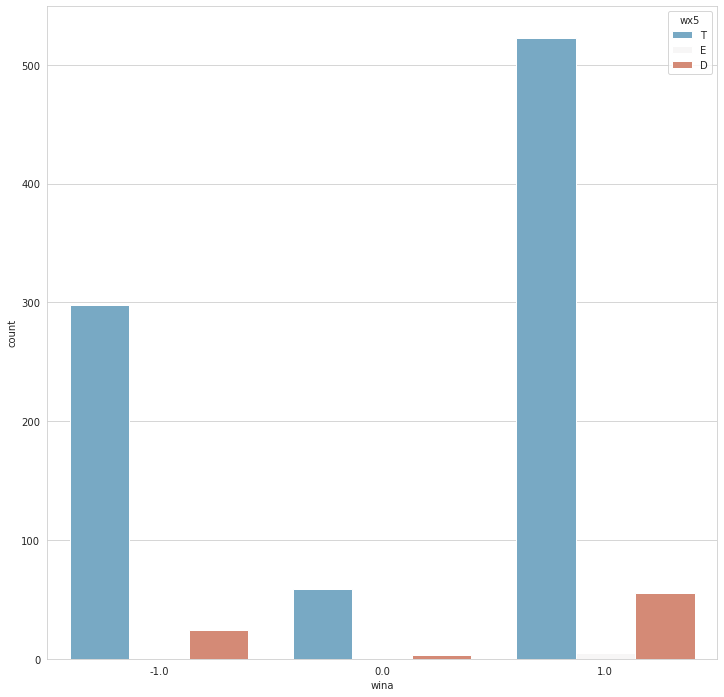

In [304]:
 for j in range(1, 6):
        
    plt.figure(figsize = (12, 12))
    sns.set_style('whitegrid')
    sns.countplot(x='wina', hue='wx{}'.format(j),data= weather ,palette='RdBu_r')


### Fortification

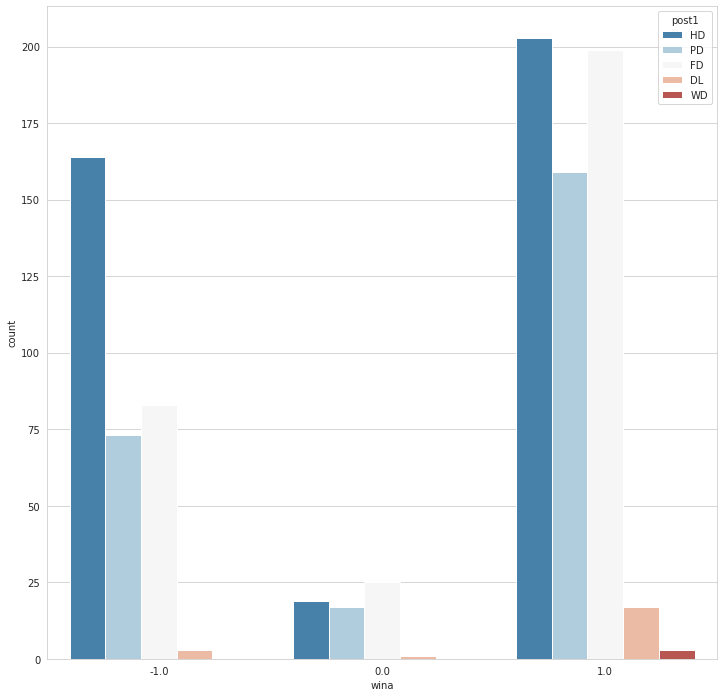

In [305]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x='wina', hue='post1',data= fortification ,palette='RdBu_r')

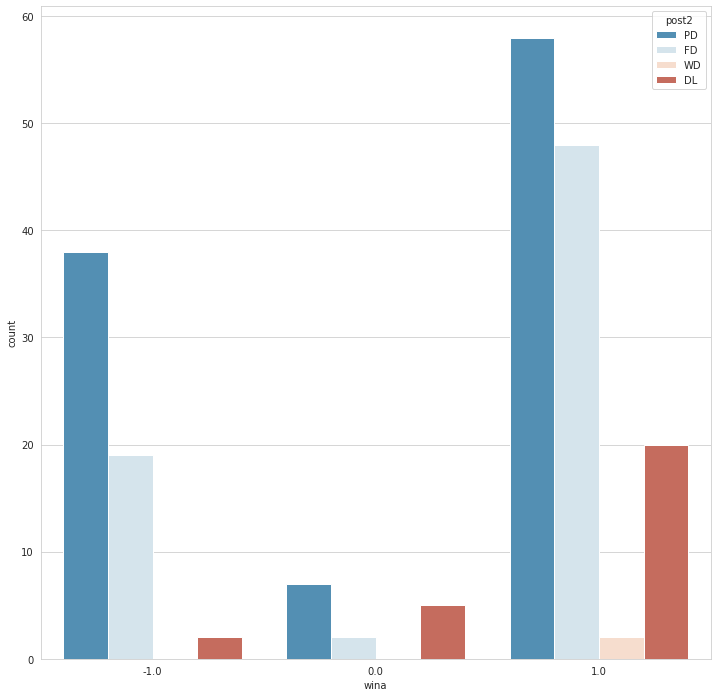

In [306]:
plt.figure(figsize = (12, 12))
sns.set_style('whitegrid')
sns.countplot(x='wina', hue='post2',data= fortification ,palette='RdBu_r')

Based on my assesment of the datasets, I'll make the following changes to the tables.

    * If there are too many missing values for imputation, it will be excluded.(terra3, post2)
    
    
    * We'll set the train and test datasets together, using Kfold.
     
    * We'll drop the columns with na values except for 'terra1':0, because we cannot manipulate the historical facts. 
    We fill in 'wx2' missing values with the most frequent values coz there's too much missing values there.
    

,surpa,post1,wx1,wx2,wx3,wx4,wx5,terra1,terra2,wina
isqno,,,,,,,,,,
1,0.0,HD,D,S,T,S,T,R,B,-1.0
2,0.0,HD,D,S,T,W,T,R,M,1.0
3,0.0,HD,D,S,H,$,T,R,M,1.0
4,NaN,PD,D,S,T,$,T,R,M,-1.0
5,0.0,HD,D,S,T,S,T,R,M,1.0
...,...,...,...,...,...,...,...,...,...,...
656,0.0,PD,D,NaN,H,S,D,R,B,-1.0
657,3.0,NaN,W,L,T,$,T,R,M,1.0
658,1.0,NaN,W,L,T,$,T,R,M,1.0


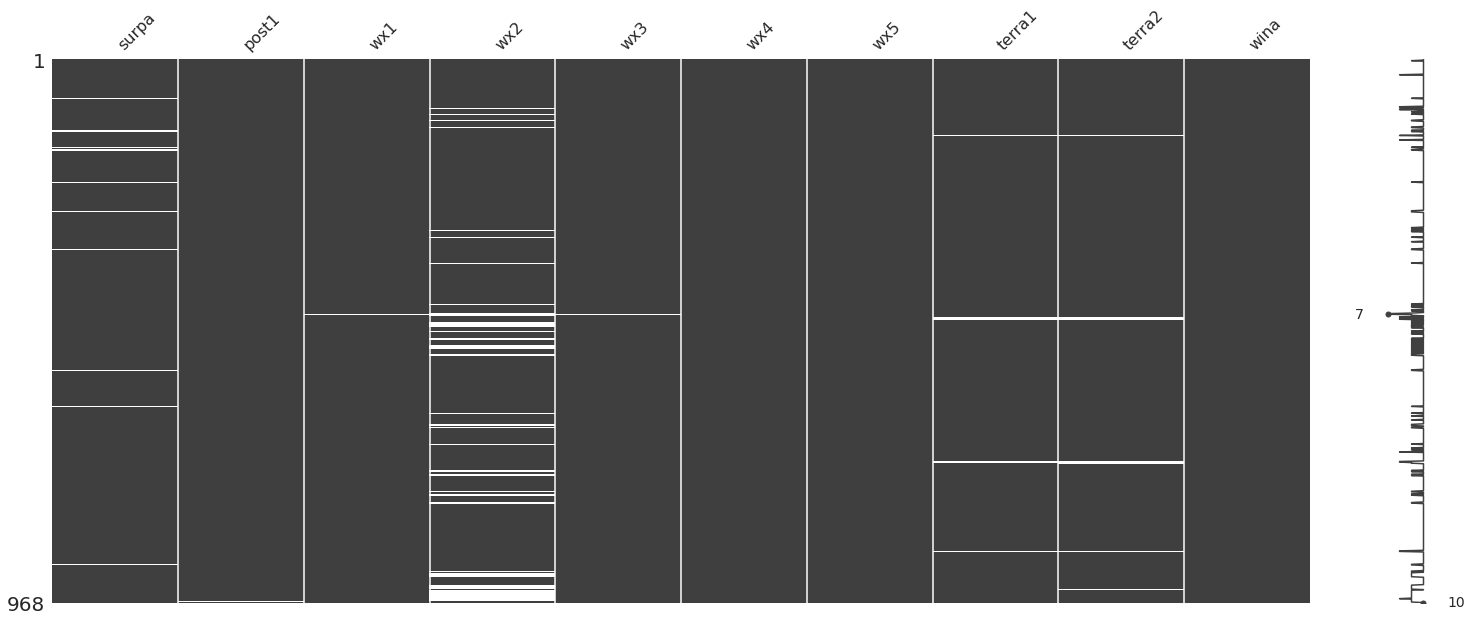

surpa      20
post1       2
wx1         2
wx2       108
wx3         2
wx4         0
wx5         0
terra1     14
terra2     18
wina        0
dtype: int64


In [307]:
df_combined = df[['surpa', 'post1', 'wx1', 'wx2', 'wx3', 'wx4', 'wx5', 'terra1', 'terra2', 'wina']]

display(df_combined)

msno.matrix(df_combined)
plt.show()
print(df_combined.isnull().sum())

In [308]:
df_combined.columns

def asdf(*args):
    bomb = []
    for a in df_combined.columns:
        if a != 'wx2':
            bomb.append(a)
        
    return bomb

column_list = asdf(df_combined.columns)
print(column_list)

['surpa', 'post1', 'wx1', 'wx3', 'wx4', 'wx5', 'terra1', 'terra2', 'wina']


In [309]:
df_combined = df_combined[column_list].dropna()
display(df_combined) #926 datas left
print(df_combined.isnull().sum())

,surpa,post1,wx1,wx3,wx4,wx5,terra1,terra2,wina
isqno,,,,,,,,,
1,0.0,HD,D,T,S,T,R,B,-1.0
2,0.0,HD,D,T,W,T,R,M,1.0
3,0.0,HD,D,H,$,T,R,M,1.0
5,0.0,HD,D,T,S,T,R,M,1.0
6,0.0,HD,D,T,F,T,R,M,-1.0
...,...,...,...,...,...,...,...,...,...
654,0.0,PD,D,T,$,E,F,M,1.0
655,0.0,PD,D,T,$,D,G,M,0.0
656,0.0,PD,D,H,S,D,R,B,-1.0


surpa     0
post1     0
wx1       0
wx3       0
wx4       0
wx5       0
terra1    0
terra2    0
wina      0
dtype: int64


In [310]:
df_mask= df_combined['wina'] != 0
df_combined = df_combined[df_mask]
df_combined

,surpa,post1,wx1,wx3,wx4,wx5,terra1,terra2,wina
isqno,,,,,,,,,
1,0.0,HD,D,T,S,T,R,B,-1.0
2,0.0,HD,D,T,W,T,R,M,1.0
3,0.0,HD,D,H,$,T,R,M,1.0
5,0.0,HD,D,T,S,T,R,M,1.0
6,0.0,HD,D,T,F,T,R,M,-1.0
...,...,...,...,...,...,...,...,...,...
651,0.0,FD,D,H,F,D,F,B,1.0
652,0.0,FD,D,H,F,D,F,B,1.0
654,0.0,PD,D,T,$,E,F,M,1.0


 Coz of asymmetry problem of the dataset, drop all wina values with 0.(draw)
Our goal is to predict which side would win(attacker or defender), so dropping 'draw' values wouldn't be a problem.


## 1. Creating categories based on Defense Formation

 * DL - D - Delaying action adopted
 * WD - W - Withdrwal
 * FD - F - Fortified defense
 * HD - H - Hasty Defense
 * PD - P - Prepared Defense

In [311]:
def check_post1():
    global df_combined
    
    df_combined['post1'] = df_combined['post1'].map(lambda ca: ca[0])
    #dummy encoding
    post1_dummies = pd.get_dummies(df_combined['post1'], prefix='post1')
    df_combined = pd.concat([df_combined, post1_dummies], axis=1)
    df_combined.drop('post1', inplace=True, axis=1)
    return df_combined

In [312]:
df_combined = check_post1()
display(df_combined)

print(df_combined['post1_D'].sum())
print(df_combined['post1_F'].sum())
print(df_combined['post1_H'].sum())
print(df_combined['post1_P'].sum())
print(df_combined['post1_W'].sum())

,surpa,wx1,wx3,wx4,wx5,terra1,terra2,wina,post1_D,post1_F,post1_H,post1_P,post1_W
isqno,,,,,,,,,,,,,
1,0.0,D,T,S,T,R,B,-1.0,0,0,1,0,0
2,0.0,D,T,W,T,R,M,1.0,0,0,1,0,0
3,0.0,D,H,$,T,R,M,1.0,0,0,1,0,0
5,0.0,D,T,S,T,R,M,1.0,0,0,1,0,0
6,0.0,D,T,F,T,R,M,-1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,D,H,F,D,F,B,1.0,0,1,0,0,0
652,0.0,D,H,F,D,F,B,1.0,0,1,0,0,0
654,0.0,D,T,$,E,F,M,1.0,0,0,0,1,0


20
273
347
223
3


def check_FD():
    global df_combined
    df_combined['post1'] = df_combined['post1'].map(lambda s: 1 if s == 'FD' else 0)
    return df_combined

df_combined = check_FD()
display(df_combined)
print(df_combined['post1'].sum())

## 2. Creating categories based on wx1

 * 'D':Dry → 0
 * W':Wet → 1

In [313]:
def check_wx1():
    global df_combined
    df_combined['wx1'] = df_combined['wx1'].map(lambda s: 1 if s == 'W' else 0)
    return df_combined

In [314]:
df_combined = check_wx1()
display(df_combined)
print(df_combined['wx1'].sum())

,surpa,wx1,wx3,wx4,wx5,terra1,terra2,wina,post1_D,post1_F,post1_H,post1_P,post1_W
isqno,,,,,,,,,,,,,
1,0.0,0,T,S,T,R,B,-1.0,0,0,1,0,0
2,0.0,0,T,W,T,R,M,1.0,0,0,1,0,0
3,0.0,0,H,$,T,R,M,1.0,0,0,1,0,0
5,0.0,0,T,S,T,R,M,1.0,0,0,1,0,0
6,0.0,0,T,F,T,R,M,-1.0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0,H,F,D,F,B,1.0,0,1,0,0,0
652,0.0,0,H,F,D,F,B,1.0,0,1,0,0,0
654,0.0,0,T,$,E,F,M,1.0,0,0,0,1,0


228


## 3. Creating categories based on wx3

Every value is turned into a column including only 0 or 1 values.

* C : Cold
* H : Hot
* T : Temparate

In [315]:
def check_wx3():
    global df_combined
    
    df_combined['wx3'] = df_combined['wx3'].map(lambda ca: ca[0])
    #dummy encoding
    wx3_dummies = pd.get_dummies(df_combined['wx3'], prefix='wx3')
    df_combined = pd.concat([df_combined, wx3_dummies], axis=1)
    df_combined.drop('wx3', inplace=True, axis=1)
    return df_combined

In [316]:
df_combined = check_wx3()
display(df_combined)
print(df_combined['wx3_C'].sum())
print(df_combined['wx3_H'].sum())
print(df_combined['wx3_T'].sum())

,surpa,wx1,wx4,wx5,terra1,terra2,wina,post1_D,post1_F,post1_H,post1_P,post1_W,wx3_C,wx3_H,wx3_T
isqno,,,,,,,,,,,,,,,
1,0.0,0,S,T,R,B,-1.0,0,0,1,0,0,0,0,1
2,0.0,0,W,T,R,M,1.0,0,0,1,0,0,0,0,1
3,0.0,0,$,T,R,M,1.0,0,0,1,0,0,0,1,0
5,0.0,0,S,T,R,M,1.0,0,0,1,0,0,0,0,1
6,0.0,0,F,T,R,M,-1.0,0,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0,F,D,F,B,1.0,0,1,0,0,0,0,1,0
652,0.0,0,F,D,F,B,1.0,0,1,0,0,0,0,1,0
654,0.0,0,$,E,F,M,1.0,0,0,0,1,0,0,0,1


86
147
633


## 4. Creating categories based on wx4

Every value is turned into a column including only 0 or 1 values.

* S : Summer
* $ : Summer
* W : Winter
* F : Fall

In [317]:
def check_wx4():
    global df_combined
    
    df_combined['wx4'] = df_combined['wx4'].map(lambda ca: ca[0])
    #dummy encoding
    wx4_dummies = pd.get_dummies(df_combined['wx4'], prefix='wx4')
    df_combined = pd.concat([df_combined, wx4_dummies], axis=1)
    df_combined.drop('wx4', inplace=True, axis=1)
    return df_combined

In [318]:
df_combined = check_wx4()
display(df_combined)
print(df_combined['wx4_S'].sum())
print(df_combined['wx4_$'].sum())
print(df_combined['wx4_W'].sum())
print(df_combined['wx4_F'].sum())

,surpa,wx1,wx5,terra1,terra2,wina,post1_D,post1_F,post1_H,post1_P,post1_W,wx3_C,wx3_H,wx3_T,wx4_$,wx4_F,wx4_S,wx4_W
isqno,,,,,,,,,,,,,,,,,,
1,0.0,0,T,R,B,-1.0,0,0,1,0,0,0,0,1,0,0,1,0
2,0.0,0,T,R,M,1.0,0,0,1,0,0,0,0,1,0,0,0,1
3,0.0,0,T,R,M,1.0,0,0,1,0,0,0,1,0,1,0,0,0
5,0.0,0,T,R,M,1.0,0,0,1,0,0,0,0,1,0,0,1,0
6,0.0,0,T,R,M,-1.0,0,0,1,0,0,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0,D,F,B,1.0,0,1,0,0,0,0,1,0,0,1,0,0
652,0.0,0,D,F,B,1.0,0,1,0,0,0,0,1,0,0,1,0,0
654,0.0,0,E,F,M,1.0,0,0,0,1,0,0,0,1,1,0,0,0


324
155
103
284


## 5. Creating categories based on wx5

Every value is turned into a column including only 0 or 1 values.

* E : Tropical (i.e., "Equatorial")
* D : Desert
* T : Temperate

In [319]:
def check_wx5():
    global df_combined
    
    df_combined['wx5'] = df_combined['wx5'].map(lambda ca: ca[0])
    #dummy encoding
    wx5_dummies = pd.get_dummies(df_combined['wx5'], prefix='wx5')
    df_combined = pd.concat([df_combined, wx5_dummies], axis=1)
    df_combined.drop('wx5', inplace=True, axis=1)
    return df_combined

In [320]:
df_combined = check_wx5()
display(df_combined)
print(df_combined['wx5_E'].sum())
print(df_combined['wx5_D'].sum())
print(df_combined['wx5_T'].sum())

,surpa,wx1,terra1,terra2,wina,post1_D,post1_F,post1_H,post1_P,post1_W,wx3_C,wx3_H,wx3_T,wx4_$,wx4_F,wx4_S,wx4_W,wx5_D,wx5_E,wx5_T
isqno,,,,,,,,,,,,,,,,,,,,
1,0.0,0,R,B,-1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
2,0.0,0,R,M,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1
3,0.0,0,R,M,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1
5,0.0,0,R,M,1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1
6,0.0,0,R,M,-1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0,F,B,1.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
652,0.0,0,F,B,1.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0
654,0.0,0,F,M,1.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0


6
77
783


## 6. Creating categories based on terrain1

* R-Rolling
* G-Rugged
* F-Flat

In [321]:
#creating function for creating categories based on the cabin of passengers
def check_terra1():
    global df_combined
    df_combined['terra1'] = df_combined['terra1'].map(lambda ca: ca[0])
    #dummy encoding
    terra1_dummies = pd.get_dummies(df_combined['terra1'], prefix='terra1')
    df_combined = pd.concat([df_combined, terra1_dummies], axis=1)
    df_combined.drop('terra1', inplace=True, axis=1)
    return df_combined

In [322]:
df_combined = check_terra1()
display(df_combined)
print(df_combined['terra1_R'].sum())
print(df_combined['terra1_G'].sum())
print(df_combined['terra1_F'].sum())

,surpa,wx1,terra2,wina,post1_D,post1_F,post1_H,post1_P,post1_W,wx3_C,wx3_H,wx3_T,wx4_$,wx4_F,wx4_S,wx4_W,wx5_D,wx5_E,wx5_T,terra1_F,terra1_G,terra1_R
isqno,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,B,-1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
2,0.0,0,M,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1
3,0.0,0,M,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1
5,0.0,0,M,1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1
6,0.0,0,M,-1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0,B,1.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
652,0.0,0,B,1.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0
654,0.0,0,M,1.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0


503
195
168


## 7. Creating categories based on terrain2

* B - Bare
* M - Mixed
* D - Desert
* W - Heavily wooded

In [323]:
#creating function for creating categories based on the cabin of passengers
def check_terra2():
    global df_combined


    df_combined['terra2'] = df_combined['terra2'].map(lambda ca: ca[0])
    #dummy encoding
    terra2_dummies = pd.get_dummies(df_combined['terra2'], prefix='terra2')
    df_combined = pd.concat([df_combined, terra2_dummies], axis=1)
    df_combined.drop('terra2', inplace=True, axis=1)
    return df_combined

In [324]:
df_combined = check_terra2()
display(df_combined)
print(df_combined['terra2_B'].sum())
print(df_combined['terra2_M'].sum())
print(df_combined['terra2_D'].sum())
print(df_combined['terra2_W'].sum())

,surpa,wx1,wina,post1_D,post1_F,post1_H,post1_P,post1_W,wx3_C,wx3_H,wx3_T,wx4_$,wx4_F,wx4_S,wx4_W,wx5_D,wx5_E,wx5_T,terra1_F,terra1_G,terra1_R,terra2_B,terra2_D,terra2_M,terra2_W
isqno,,,,,,,,,,,,,,,,,,,,,,,,,
1,0.0,0,-1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,1,0,0,0
2,0.0,0,1.0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,0,1,0,0,1,0
3,0.0,0,1.0,0,0,1,0,0,0,1,0,1,0,0,0,0,0,1,0,0,1,0,0,1,0
5,0.0,0,1.0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,1,0,0,1,0,0,1,0
6,0.0,0,-1.0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
651,0.0,0,1.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
652,0.0,0,1.0,0,1,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0
654,0.0,0,1.0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,1,0,0,0,0,1,0


114
611
87
54


In [325]:
#changing 'wina' value range from -1~1 to 0~2
df_combined['wina'] = df_combined['wina'].apply(lambda x: x+1)
df_combined['wina']
# 0: attacker loss, 1: draw, 2: attacker win 

isqno
1      0.0
2      2.0
3      2.0
5      2.0
6      0.0
      ... 
651    2.0
652    2.0
654    2.0
656    0.0
659    0.0
Name: wina, Length: 866, dtype: float64

# **Building and Training the Models**

In [326]:
#Making X_set and Y_set
X_set = df_combined.drop('wina', axis = 1)
y_set = df_combined['wina']

In [327]:
#Separating the train and test dataframes
x_train = X_set.copy().sample(frac = 0.7, random_state = 2)
x_test = X_set.copy().sample(frac = 0.3, random_state = 2)
y_train = y_set.copy().sample(frac = 0.7, random_state = 2)
y_test = y_set.copy().sample(frac = 0.3, random_state = 2)
x_test.reset_index(inplace=True, drop=True)
x_train.shape, x_test.shape

((606, 24), (260, 24))

In [328]:
y_test.value_counts()

2.0    168
0.0     92
Name: wina, dtype: int64

<h2>1. Random Forest Model</h2>

In [329]:
random_forest = RandomForestClassifier(max_depth=2, n_estimators=100, random_state=0)
model1 = random_forest.fit(x_train, y_train)

y_pred_random_forest = random_forest.predict(x_test)

In [330]:
cross_val_score(RandomForestClassifier(max_depth = 2), X_set, y_set, scoring="accuracy", cv=5).mean()

0.6558899740881005

In [331]:
from sklearn.metrics import confusion_matrix

confusion_matrix(y_test, y_pred_random_forest)

array([[  0,  92],
       [  0, 168]])

In [333]:
from sklearn.metrics import classification_report

target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_random_forest, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.00      0.00      0.00        92
    attk_win       0.65      1.00      0.79       168

    accuracy                           0.65       260
   macro avg       0.32      0.50      0.39       260
weighted avg       0.42      0.65      0.51       260



/opt/conda/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


<h2>2. Logistic Regression Model</h2>

In [334]:
log_regres = LogisticRegression()
model2 = log_regres.fit(x_train, y_train)

y_pred_log_regres = log_regres.predict(x_test)

In [335]:
cross_val_score(LogisticRegression(), X_set, y_set, scoring="accuracy", cv=5).mean()

0.599395389010697

In [336]:
confusion_matrix(y_test, y_pred_log_regres)

array([[ 14,  78],
       [ 13, 155]])

In [338]:
target_names = ['attk_loss','attk_win']
print(classification_report(y_test, y_pred_log_regres, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.52      0.15      0.24        92
    attk_win       0.67      0.92      0.77       168

    accuracy                           0.65       260
   macro avg       0.59      0.54      0.50       260
weighted avg       0.61      0.65      0.58       260



<h2>3. K-nearest Neighbors</h2>

In [362]:
knn = KNeighborsClassifier(n_neighbors=2)
model3 = knn.fit(x_train, y_train)

y_pred_knn = knn.predict(x_test)

In [363]:
cross_val_score(KNeighborsClassifier(n_neighbors=3), X_set, y_set, scoring="accuracy", cv=5).mean()

0.5312537372932031

In [364]:
confusion_matrix(y_test, y_pred_knn)

array([[ 88,   4],
       [ 56, 112]])

In [365]:
target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_knn, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.61      0.96      0.75        92
    attk_win       0.97      0.67      0.79       168

    accuracy                           0.77       260
   macro avg       0.79      0.81      0.77       260
weighted avg       0.84      0.77      0.77       260



<h2>4. Gaussian Naive Bayes Model</h2>

In [343]:
gaussian = GaussianNB()
model4 = gaussian.fit(x_train, y_train)

y_pred_gaussian = gaussian.predict(x_test)

In [344]:
cross_val_score(GaussianNB(), X_set, y_set, scoring="accuracy", cv=5).mean()

0.3637698491794565

In [345]:
confusion_matrix(y_test, y_pred_gaussian)

array([[ 91,   1],
       [161,   7]])

In [346]:
target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_gaussian, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.36      0.99      0.53        92
    attk_win       0.88      0.04      0.08       168

    accuracy                           0.38       260
   macro avg       0.62      0.52      0.30       260
weighted avg       0.69      0.38      0.24       260



<h2>5. Perceptrons Model</h2>

In [347]:
perceptron = Perceptron()
model5 = perceptron.fit(x_train, y_train)

y_pred_perceptron = perceptron.predict(x_test)

In [348]:
cross_val_score(Perceptron(), X_set, y_set, scoring="accuracy", cv=5).mean()

0.5912364626935087

In [349]:
confusion_matrix( y_test, y_pred_perceptron)

array([[ 85,   7],
       [155,  13]])

In [351]:
target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_perceptron, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.35      0.92      0.51        92
    attk_win       0.65      0.08      0.14       168

    accuracy                           0.38       260
   macro avg       0.50      0.50      0.33       260
weighted avg       0.55      0.38      0.27       260



<h2>6. Support Vector Machine Model</h2>

In [352]:
svc = LinearSVC()
model6 = svc.fit(x_train, y_train)

y_pred_svc = svc.predict(x_test)

In [353]:
cross_val_score(LinearSVC(), X_set, y_set, scoring="accuracy", cv=5).mean()

0.5982459637233407

In [354]:
confusion_matrix(y_test, y_pred_svc)

array([[ 14,  78],
       [ 13, 155]])

In [355]:
target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_svc, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.52      0.15      0.24        92
    attk_win       0.67      0.92      0.77       168

    accuracy                           0.65       260
   macro avg       0.59      0.54      0.50       260
weighted avg       0.61      0.65      0.58       260



<h2>7. Decision Tree Model</h2>

In [356]:
tree = DecisionTreeClassifier()
model7 = tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)

In [357]:
cross_val_score(DecisionTreeClassifier(), X_set, y_set, scoring="accuracy", cv=5).mean()

0.5093017075277391

In [358]:
confusion_matrix(y_test, y_pred_tree)

array([[ 73,  19],
       [ 28, 140]])

In [359]:
target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_tree, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.72      0.79      0.76        92
    attk_win       0.88      0.83      0.86       168

    accuracy                           0.82       260
   macro avg       0.80      0.81      0.81       260
weighted avg       0.82      0.82      0.82       260



<h2>8. XGBoost Model</h2>

In [366]:
#Transforming data into Dmatrix form
d_x_train = xgb.DMatrix(x_train, label=y_train)

In [370]:
#Setting the parameters
param = {
    'eta': 0.5, 
    'max_depth': 20,  
    'objective': 'multi:softprob',  
    'num_class': 3} 

steps = 20  # The number of training iterations

In [371]:
#Training the model
xgb_model = xgb.train(param, d_x_train, steps)
 
y_pred_xgb = xgb_model.predict(d_x_train)
#Converting the prediction intp numpy array
y_pred_xgb_new = np.asarray([np.argmax(line) for line in y_pred_xgb])

In [372]:
xgb_model_accuracy = round(accuracy_score(y_train, y_pred_xgb_new)*100, 2)
xgb_model_accuracy

80.53

In [373]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, x_train, y_train, cv=11, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.57142857 0.61818182 0.63636364 0.72727273 0.65454545 0.58181818
 0.72727273 0.58181818 0.65454545 0.63636364 0.63636364]
Mean: 0.6387249114521842
Standard Deviation: 0.05011469138414099


This score shows that our model has an average accuracy of 59% with a standard deviation of around 5.1%

# 9. Voting Classifier

When using VotingClassifier, droping models with no predict_proba.
Also dropping the models with less than 0.4 cross validation scores and accuracy(on classificiation report).

In [377]:
from sklearn.ensemble import VotingClassifier

xmodel1 = RandomForestClassifier(max_depth=1, n_estimators=100, random_state=0)
xmodel2 = LogisticRegression(random_state=1)
xmodel3 = KNeighborsClassifier(n_neighbors=3)
#xmodel4 = GaussianNB()
#xmodel5 = Perceptron()
#xmodel6 = LinearSVC()
xmodel7 = DecisionTreeClassifier()

ensemble = VotingClassifier(estimators=[('rf', xmodel1), ('lr', xmodel2), ('knn', xmodel3),
                                       ('dt', xmodel7)], voting='soft')

ensemble2 = ensemble.fit(x_train, y_train)
y_pred_ensemble = ensemble2.predict(x_test)

In [378]:
cross_val_score(ensemble, X_set, y_set, scoring="accuracy", cv=5).mean()

0.5612916085309946

In [379]:
confusion_matrix(y_test, y_pred_ensemble)

array([[ 44,  48],
       [  8, 160]])

In [381]:
target_names = ['attk_loss', 'attk_win']
print(classification_report(y_test, y_pred_ensemble, target_names=target_names))

              precision    recall  f1-score   support

   attk_loss       0.85      0.48      0.61        92
    attk_win       0.77      0.95      0.85       168

    accuracy                           0.78       260
   macro avg       0.81      0.72      0.73       260
weighted avg       0.80      0.78      0.77       260



<h2>Feature Importance</h2>

In [382]:
importances = pd.DataFrame({'Feature':x_train.columns,'Importance':np.round(random_forest.feature_importances_,3)})
importances_df = importances.sort_values('Importance', ascending=False).reset_index(drop=True)
importances_plot = importances.sort_values('Importance', ascending=False).set_index('Feature')
importances_plot.head()

,Importance
Feature,
surpa,0.221
post1_H,0.130
wx4_W,0.070
terra2_W,0.067
wx3_C,0.055


In [383]:
#Plotting the Features importances
fig_bar_feature = go.Figure()
fig_bar_feature.add_trace(go.Bar(x=importances_df['Feature'], y=importances_df['Importance']))
fig_bar_feature.update_layout(width=800, title_text='Importances of Features',
                       xaxis_title_text='Features', yaxis_title_text='Importance', xaxis_tickangle=-45)
fig_bar_feature.show()

From the graph we can see that all the categories after "wx3_T" and onwards doesn't play an important role in the prediction, hence dropping those categories.

In [384]:
for i in range(10, importances_df.shape[0]):
    column = importances_df['Feature'][i]
    X_set.drop([column], inplace=True, axis=1)

display(X_set)

,surpa,post1_F,post1_H,wx3_C,wx4_$,wx4_F,wx4_W,terra1_R,terra2_B,terra2_W
isqno,,,,,,,,,,
1,0.0,0,1,0,0,0,0,1,1,0
2,0.0,0,1,0,0,0,1,1,0,0
3,0.0,0,1,0,1,0,0,1,0,0
5,0.0,0,1,0,0,0,0,1,0,0
6,0.0,0,1,0,0,1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...
651,0.0,1,0,0,0,1,0,0,1,0
652,0.0,1,0,0,0,1,0,0,1,0
654,0.0,0,0,0,1,0,0,0,0,0


In [385]:
#Separate the train and test dataframes
#Separating the train and test dataframes
x_train = X_set.copy().sample(frac = 0.7, random_state = 2)
x_test = X_set.copy().sample(frac = 0.3, random_state = 2)
x_test.reset_index(inplace=True, drop=True)

In [387]:
random_forest = RandomForestClassifier()
random_forest.fit(x_train, y_train)
y_prediction = random_forest.predict(x_test)


accuracy_random_forest = round(random_forest.score(x_train, y_train)*100, 2)
accuracy_random_forest 

75.74

<h2>Training Decision Tree Model Again</h2>

In [388]:
tree = DecisionTreeClassifier()
tree.fit(x_train, y_train)

y_pred_tree = tree.predict(x_test)

tree_accuracy = round(tree.score(x_train, y_train)*100, 2)
tree_accuracy

75.74

<h2>Training XGBoost Model Again</h2>

In [389]:
#Transforming data into Dmatrix form
d_x_train = xgb.DMatrix(x_train, label=y_train)
d_x_test = xgb.DMatrix(x_test)

In [390]:
xgb_model = xgb.train(param, d_x_train, steps)
y_pred_xgb = xgb_model.predict(d_x_test)
y_pred_xgb_new = np.asarray([np.argmax(line) for line in y_pred_xgb])

In [392]:
rf = RandomForestClassifier()
scores = cross_val_score(rf, x_train, y_train, cv=11, scoring='accuracy')

print("Scores:", scores)
print("Mean:", scores.mean())
print("Standard Deviation:", scores.std())

Scores: [0.58928571 0.72727273 0.65454545 0.70909091 0.67272727 0.6
 0.70909091 0.63636364 0.69090909 0.63636364 0.69090909]
Mean: 0.6651416765053129
Standard Deviation: 0.04356290566540408


# Submission

> # Summary

This project enhanced my Machine Learnin